In [1]:
#import library
import urllib.request, urllib.parse, urllib.error
import ssl
from bs4 import BeautifulSoup
import pandas as pd
import time

In [ ]:
# Define the URL of the website to scrape
url = 'https://books.toscrape.com'

# Fetch the HTML content of the main page
htm = urllib.request.urlopen(url).read()

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(htm, 'html.parser')

# Find all the book titles on the main page
handle = soup.find_all('h3')

# Iterate through each book title
for links in handle:
    # Find the URL of the book details page within the title element
    link = links.find('a')['href']
    
    # Construct the absolute URL of the book details page
    burl = urllib.parse.urljoin(url, link)
    
    # Fetch the HTML content of the book details page
    bhtm = urllib.request.urlopen(burl).read()
    
    # Parse the book details page HTML using BeautifulSoup
    bsoup = BeautifulSoup(bhtm, 'html.parser')
    
    # Extract relevant information from the book details page
    title = bsoup.find('h1').text
    rating = bsoup.find('p', class_="star-rating")['class'][1]
    category = bsoup.find('ul', class_="breadcrumb").find_all('a')[2].text
    price = bsoup.find('p', class_="price_color").text
    availability = bsoup.find('p', class_="instock availability").text.strip()
    
    # Print the extracted information for each book
    print('Title:', title)
    print('Rating:', rating)
    print('Category:', category)
    print('Price:', price)
    print('Availability:', availability)

In [ ]:
# Rerun almost the same code but using a range function of (1, 51) to parse through 50 pages of the web address
start_time = time.time()
books = []
count = 0
for i in range(1, 51):
    url = f'https://books.toscrape.com/catalogue/page-{i}.html'
    htm = urllib.request.urlopen(url).read()
    soup = BeautifulSoup(htm, 'html.parser')

    handle = soup.find_all('h3')
    
    for links in handle:
        link = links.find('a')['href']
        burl = urllib.parse.urljoin(url, link)
        bhtm = urllib.request.urlopen(burl).read()
        bsoup = BeautifulSoup(bhtm, 'html.parser')

        title = bsoup.find('h1').text
        rating = bsoup.find('p', class_="star-rating")['class'][1]
        category = bsoup.find('ul', class_="breadcrumb").find_all('a')[2].text
        price = bsoup.find('p', class_="price_color").text
        availability = bsoup.find('p', class_="instock availability").text.strip()

        books.append([title, rating, category, price, availability])
        
        count += 1 
        endtime = time.time()
total_time = (endtime - start_time)/60
        
print(count)
print(total_time)
print(books)

In [ ]:
# convert list to dataframe
df = pd.DataFrame(books, columns=['title', 'rating', 'category', 'price', 'availability'])

# save dataframe as csv file
df.to_csv('firstextract.csv', index = False)

In [59]:
# visualization
# import necessary visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os


os.getcwd()

#opening and reading the file
dfmain = pd.read_csv('/Users/user/fisrtextractever.csv')
df = dfmain.copy()

# display table to see all columns and objects
df

In [69]:
#Cleaning Table

#changing price to float type
df['Price']= df['Price'].replace('£', '').astype(float)

# Extract Numbers of Availability And Adding Another column 
df['availability_numeric'] = df['Availability'].str.extract(r'(\d+)').astype(int)

#Rename availability_numeric to InStock
df.rename(columns = {'availability_numeric':'InStock'}, inplace = True)

#Create a new column Book Rating mapping out rating in words to numbers
ratting_map = {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5
}
df['BookRating']= df['Rating'].map(ratting_map)



<Axes: title={'center': 'The relationship between category and total count'}, xlabel='Total Count', ylabel='Categories of Book'>

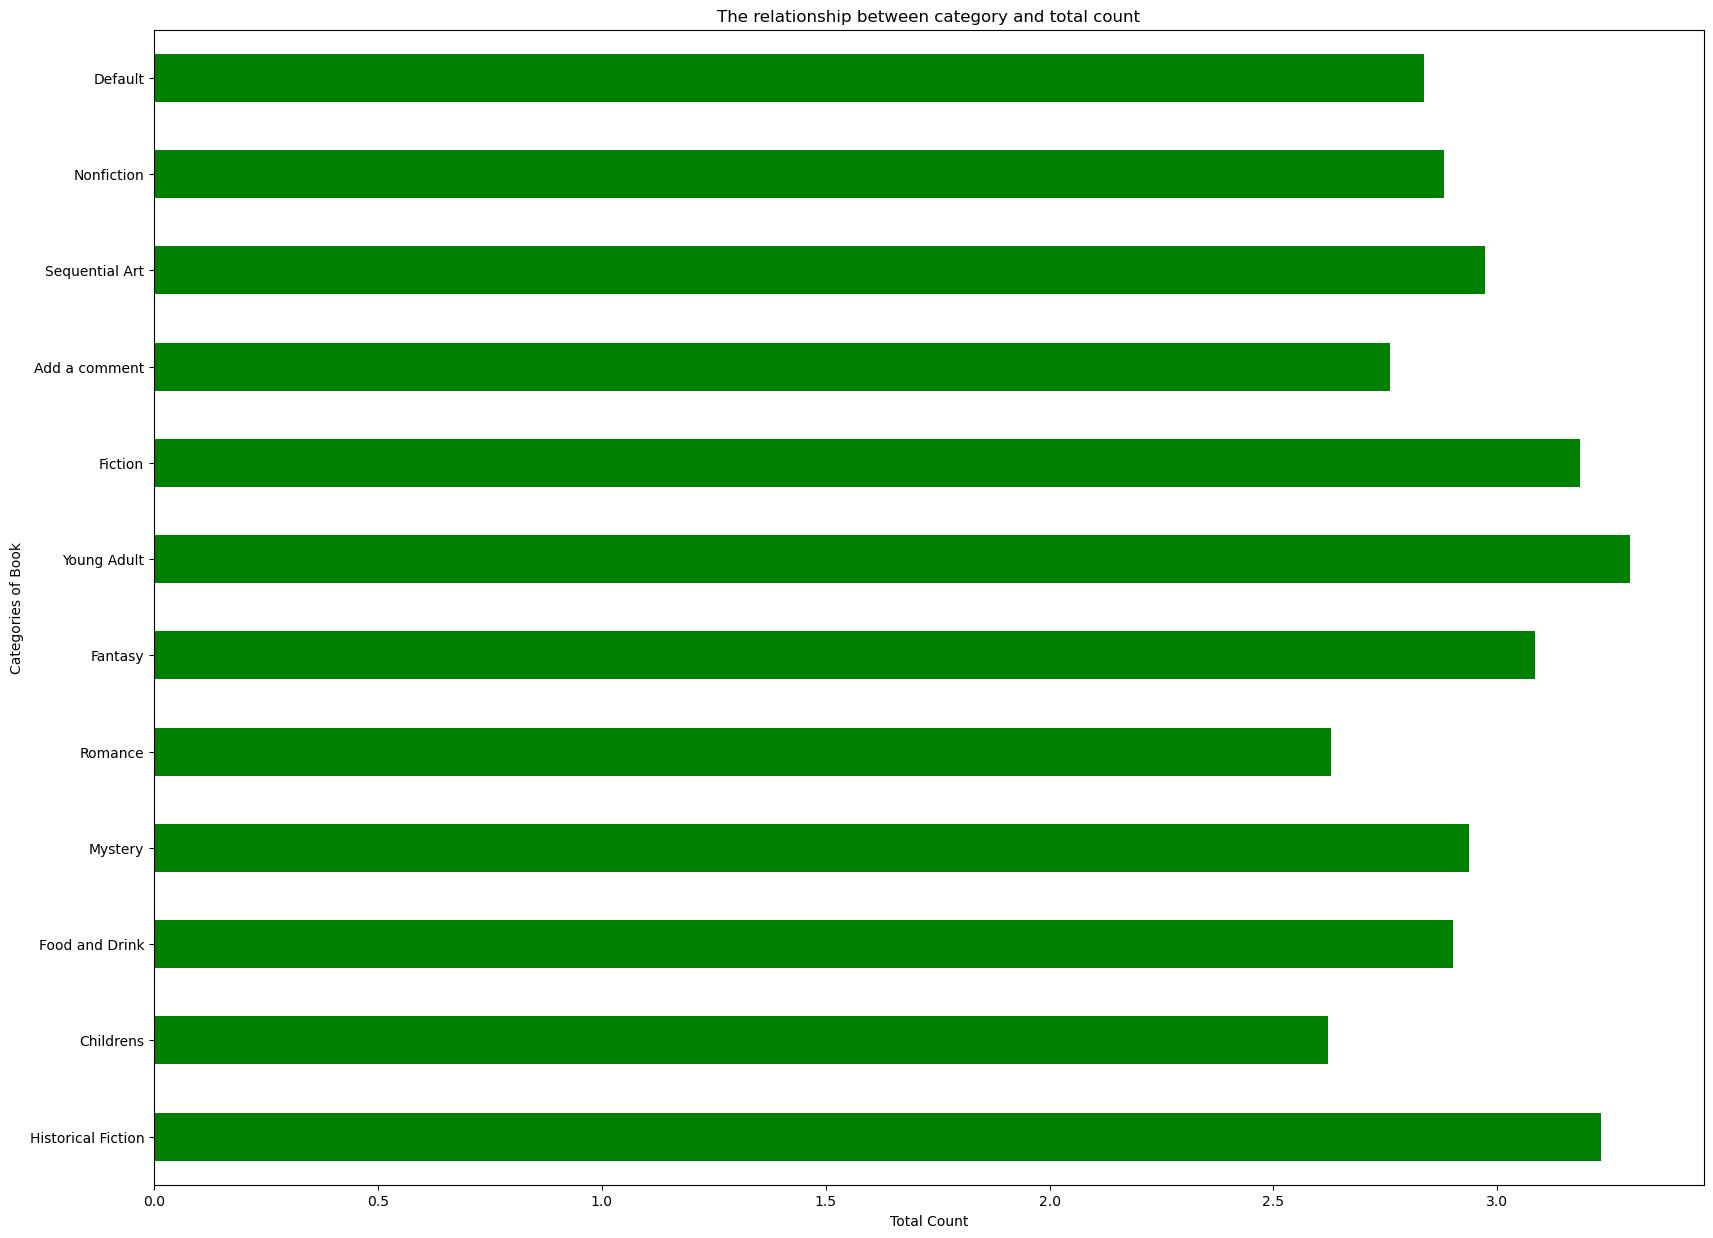

In [110]:
# visualization

#relationship between BookRating and mean calculation of each category

df.groupby('Category')['BookRating']\
        .agg(['mean', 'count'])\
        .query('count >= 25')\
        .sort_values('count')['mean']\
        .plot(kind = 'barh', figsize =(20,15), color = 'Green', title ='The relationship between category and total count',
             xlabel = 'Total Count', ylabel = 'Categories of Book')


             InStock     Price  BookRating
InStock     1.000000 -0.010914    0.016166
Price      -0.010914  1.000000    0.028166
BookRating  0.016166  0.028166    1.000000


<Axes: >

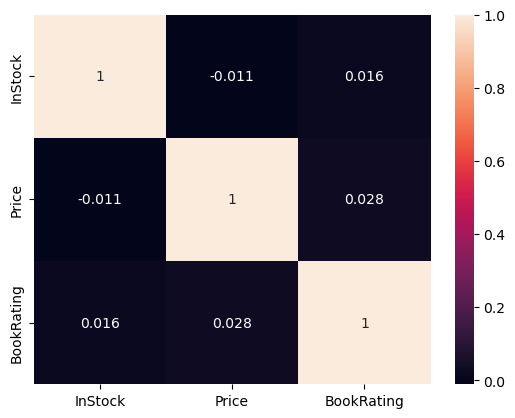

In [82]:
#correlations between Rating Price, Availability

correlation = df[['InStock', 'Price', 'BookRating']].corr()
print(correlation)

sns.heatmap(correlation, annot=True)

<Axes: xlabel='Rating'>

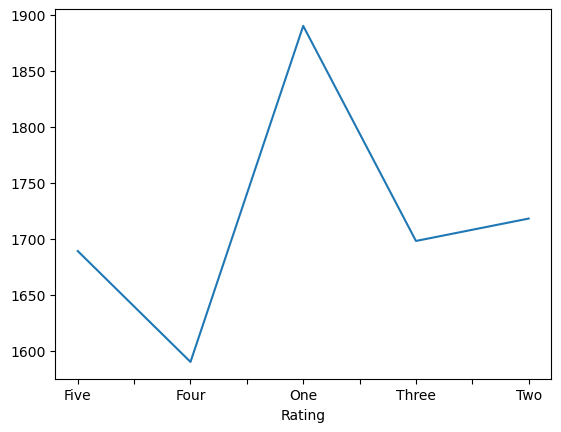

In [98]:
df.groupby('Rating')['InStock'].sum().plot()

<Axes: xlabel='Category', ylabel='Total $ Sold'>

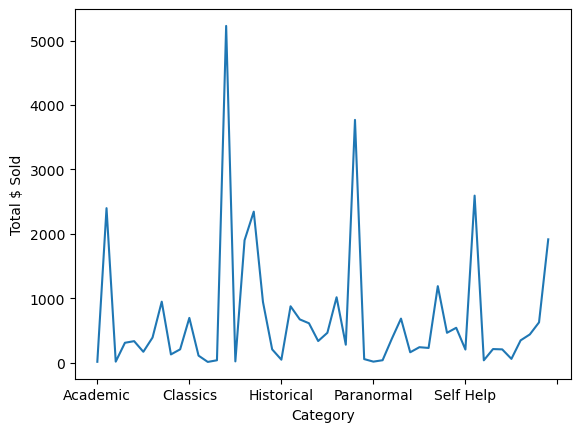

In [100]:
#relationship between categories to price

df.groupby('Category')['Price'].sum().plot(ylabel = 'Total $ Sold')

<Axes: ylabel='Category'>

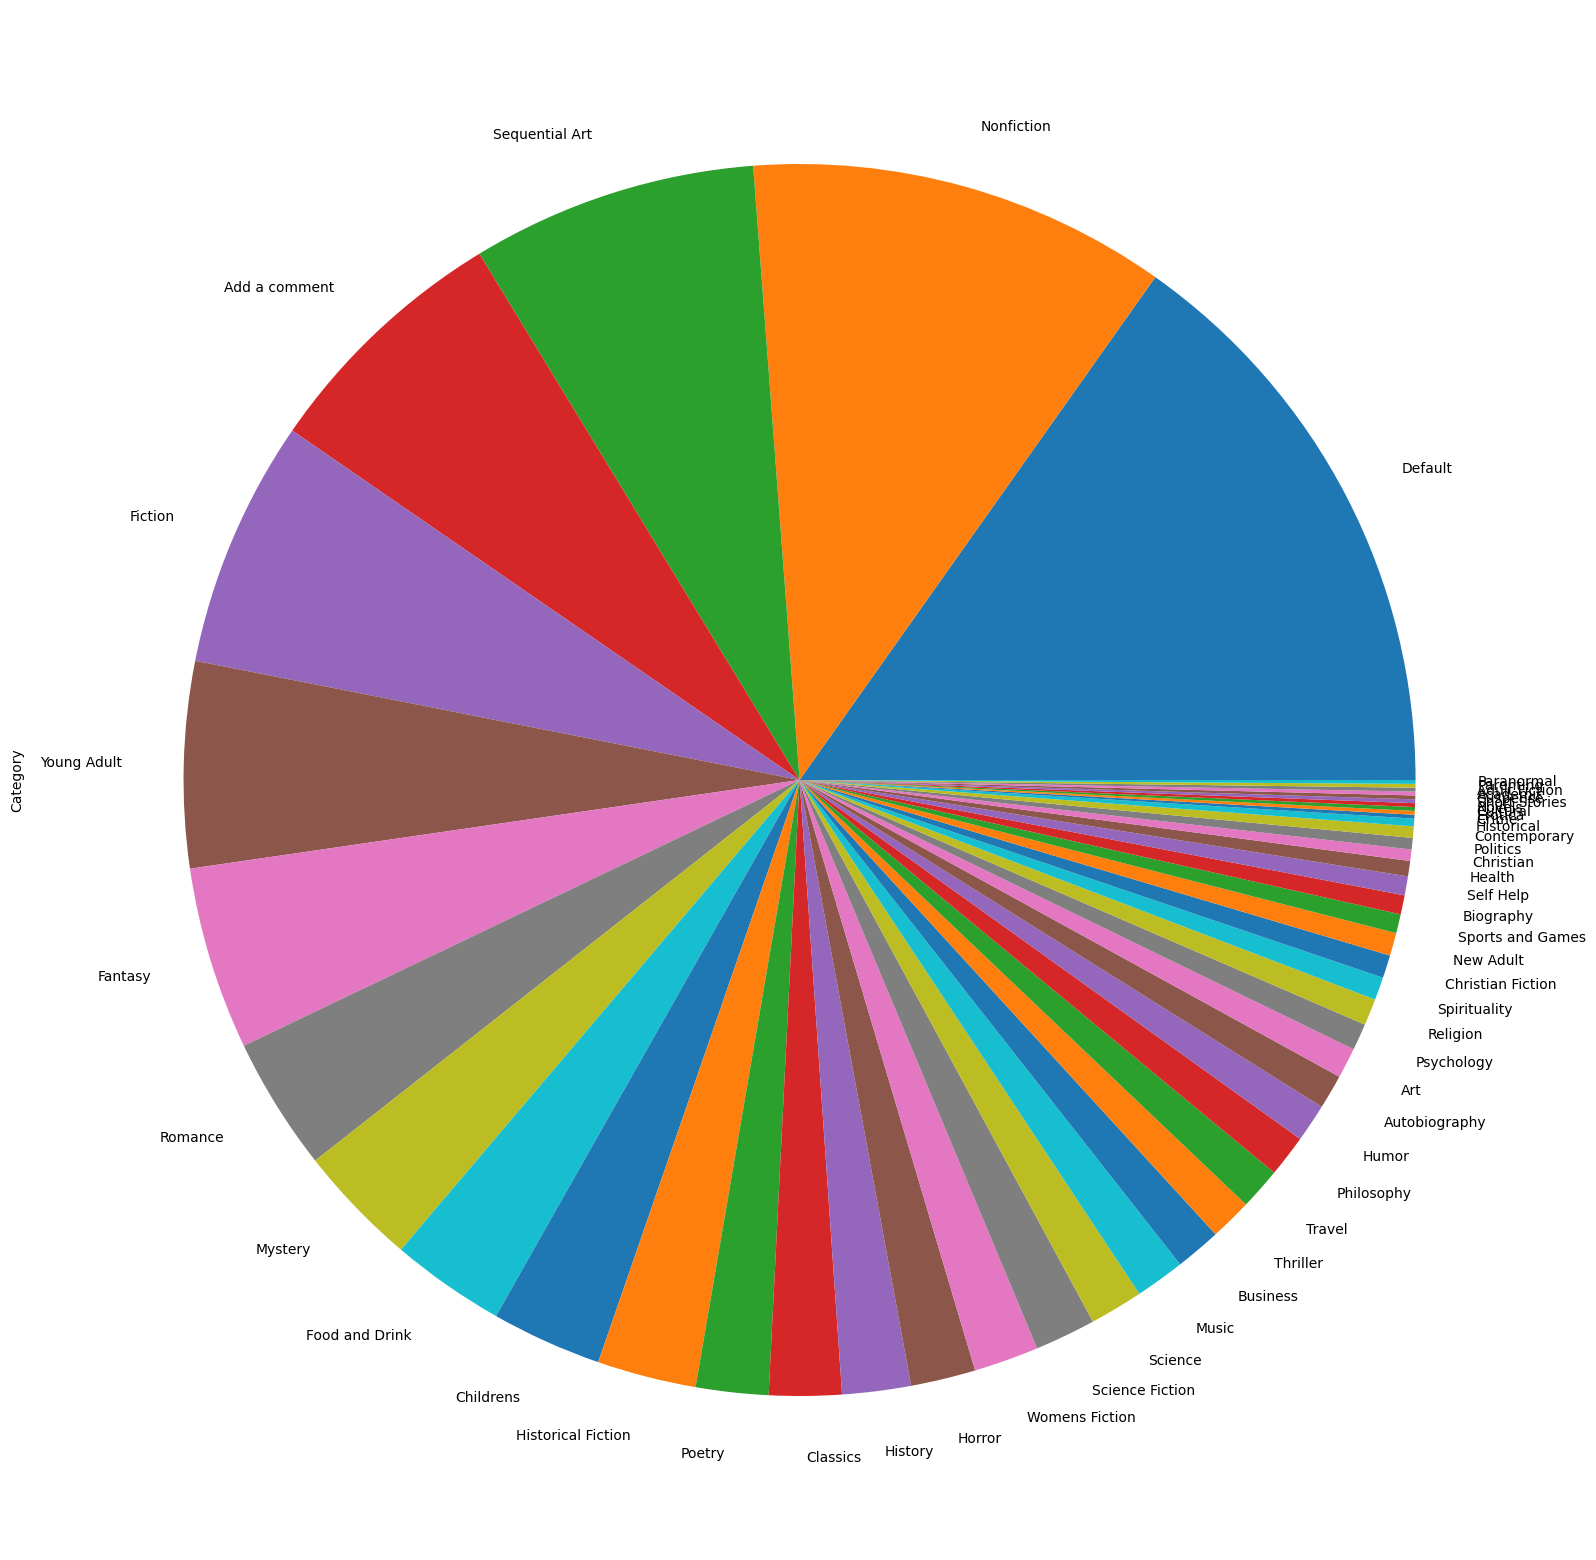

In [104]:
#relationship between categories and total count of book sold

df['Category'].value_counts().plot(kind='pie', figsize=(20,20))

<Axes: xlabel='Price', ylabel='InStock'>

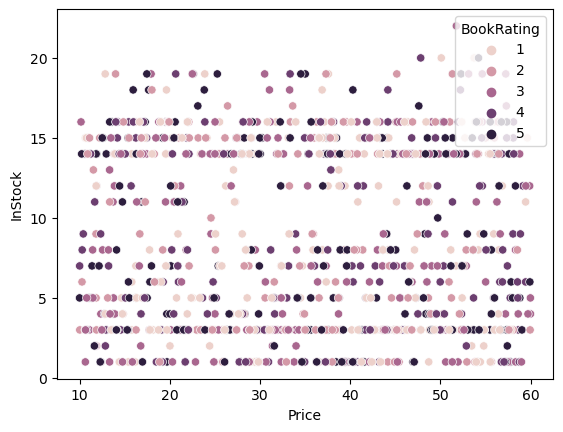

In [108]:
#Relationship between Price and books still in Stock

sns.scatterplot(x='Price', y='InStock', data = df, hue = 'BookRating')

<Axes: title={'center': 'Category Chart'}, xlabel='Book Category', ylabel='Total Count of Availability'>

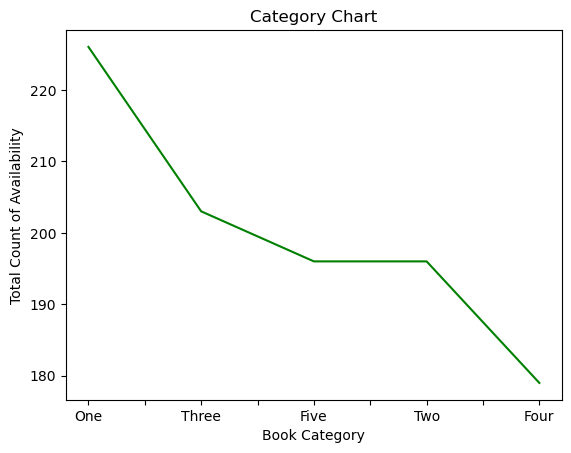

In [109]:
# what book rating has the highest count

df['Rating'].value_counts().plot(kind='line', title='Category Chart', 
                                 color = 'green', ylabel = 'Total Count of Availability', 
                                 xlabel = 'Book Category')